# Breast Cancer Classification

Logistic Regression

In [472]:
# import necessery libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [473]:
# function to replace any '\' with '/' in the path
def replace_back_slash_with_slash(path: str) -> str:
    return path.replace('\\', '/')


In [474]:
Breast_Cancer_dataset_for_logstic_regression_model = pd.read_csv(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\breast-cancer.csv'))

In [475]:
Breast_Cancer_dataset_for_logstic_regression_model.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [476]:
Breast_Cancer_dataset_for_logstic_regression_model.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [477]:
Breast_Cancer_dataset_for_logstic_regression_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [478]:
Breast_Cancer_dataset_for_logstic_regression_model.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [479]:
# check if there is any null value
Breast_Cancer_dataset_for_logstic_regression_model.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

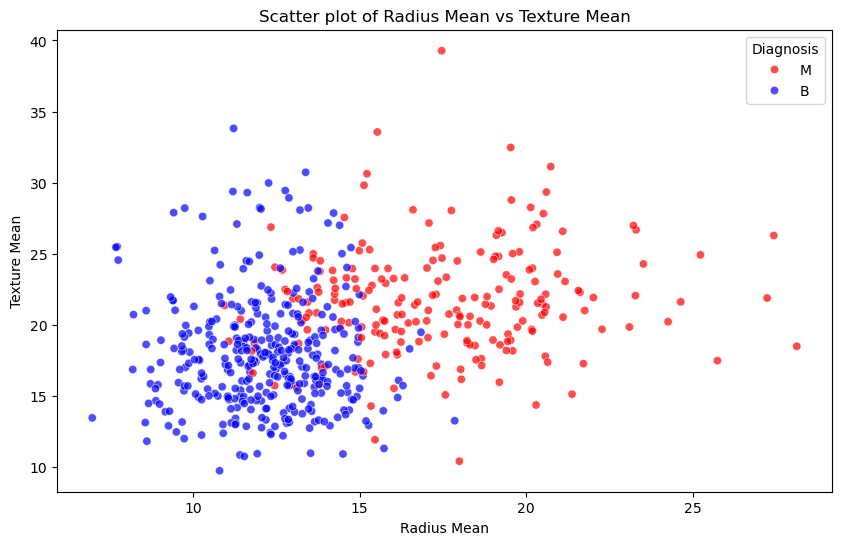

In [480]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Breast_Cancer_dataset_for_logstic_regression_model, x='radius_mean', y='texture_mean', hue='diagnosis', palette={'M': 'red', 'B': 'blue'}, markers= '+', alpha=0.7)

plt.title('Scatter plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()

C:\Users\Fayedolla\AppData\Local\Temp\ipykernel_3160\2808332803.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diagnosis')


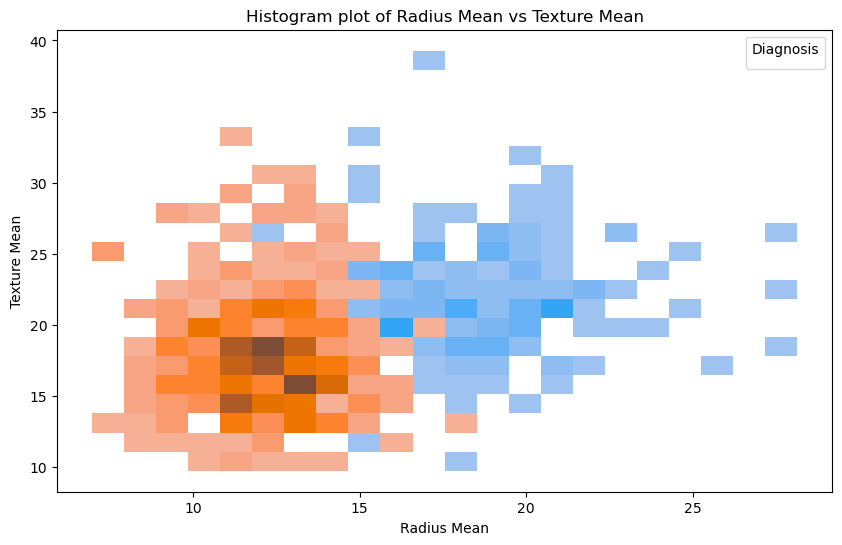

In [481]:
plt.figure(figsize=(10, 6))
sns.histplot(data=Breast_Cancer_dataset_for_logstic_regression_model, x='radius_mean', y='texture_mean', hue='diagnosis')

plt.title('Histogram plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()

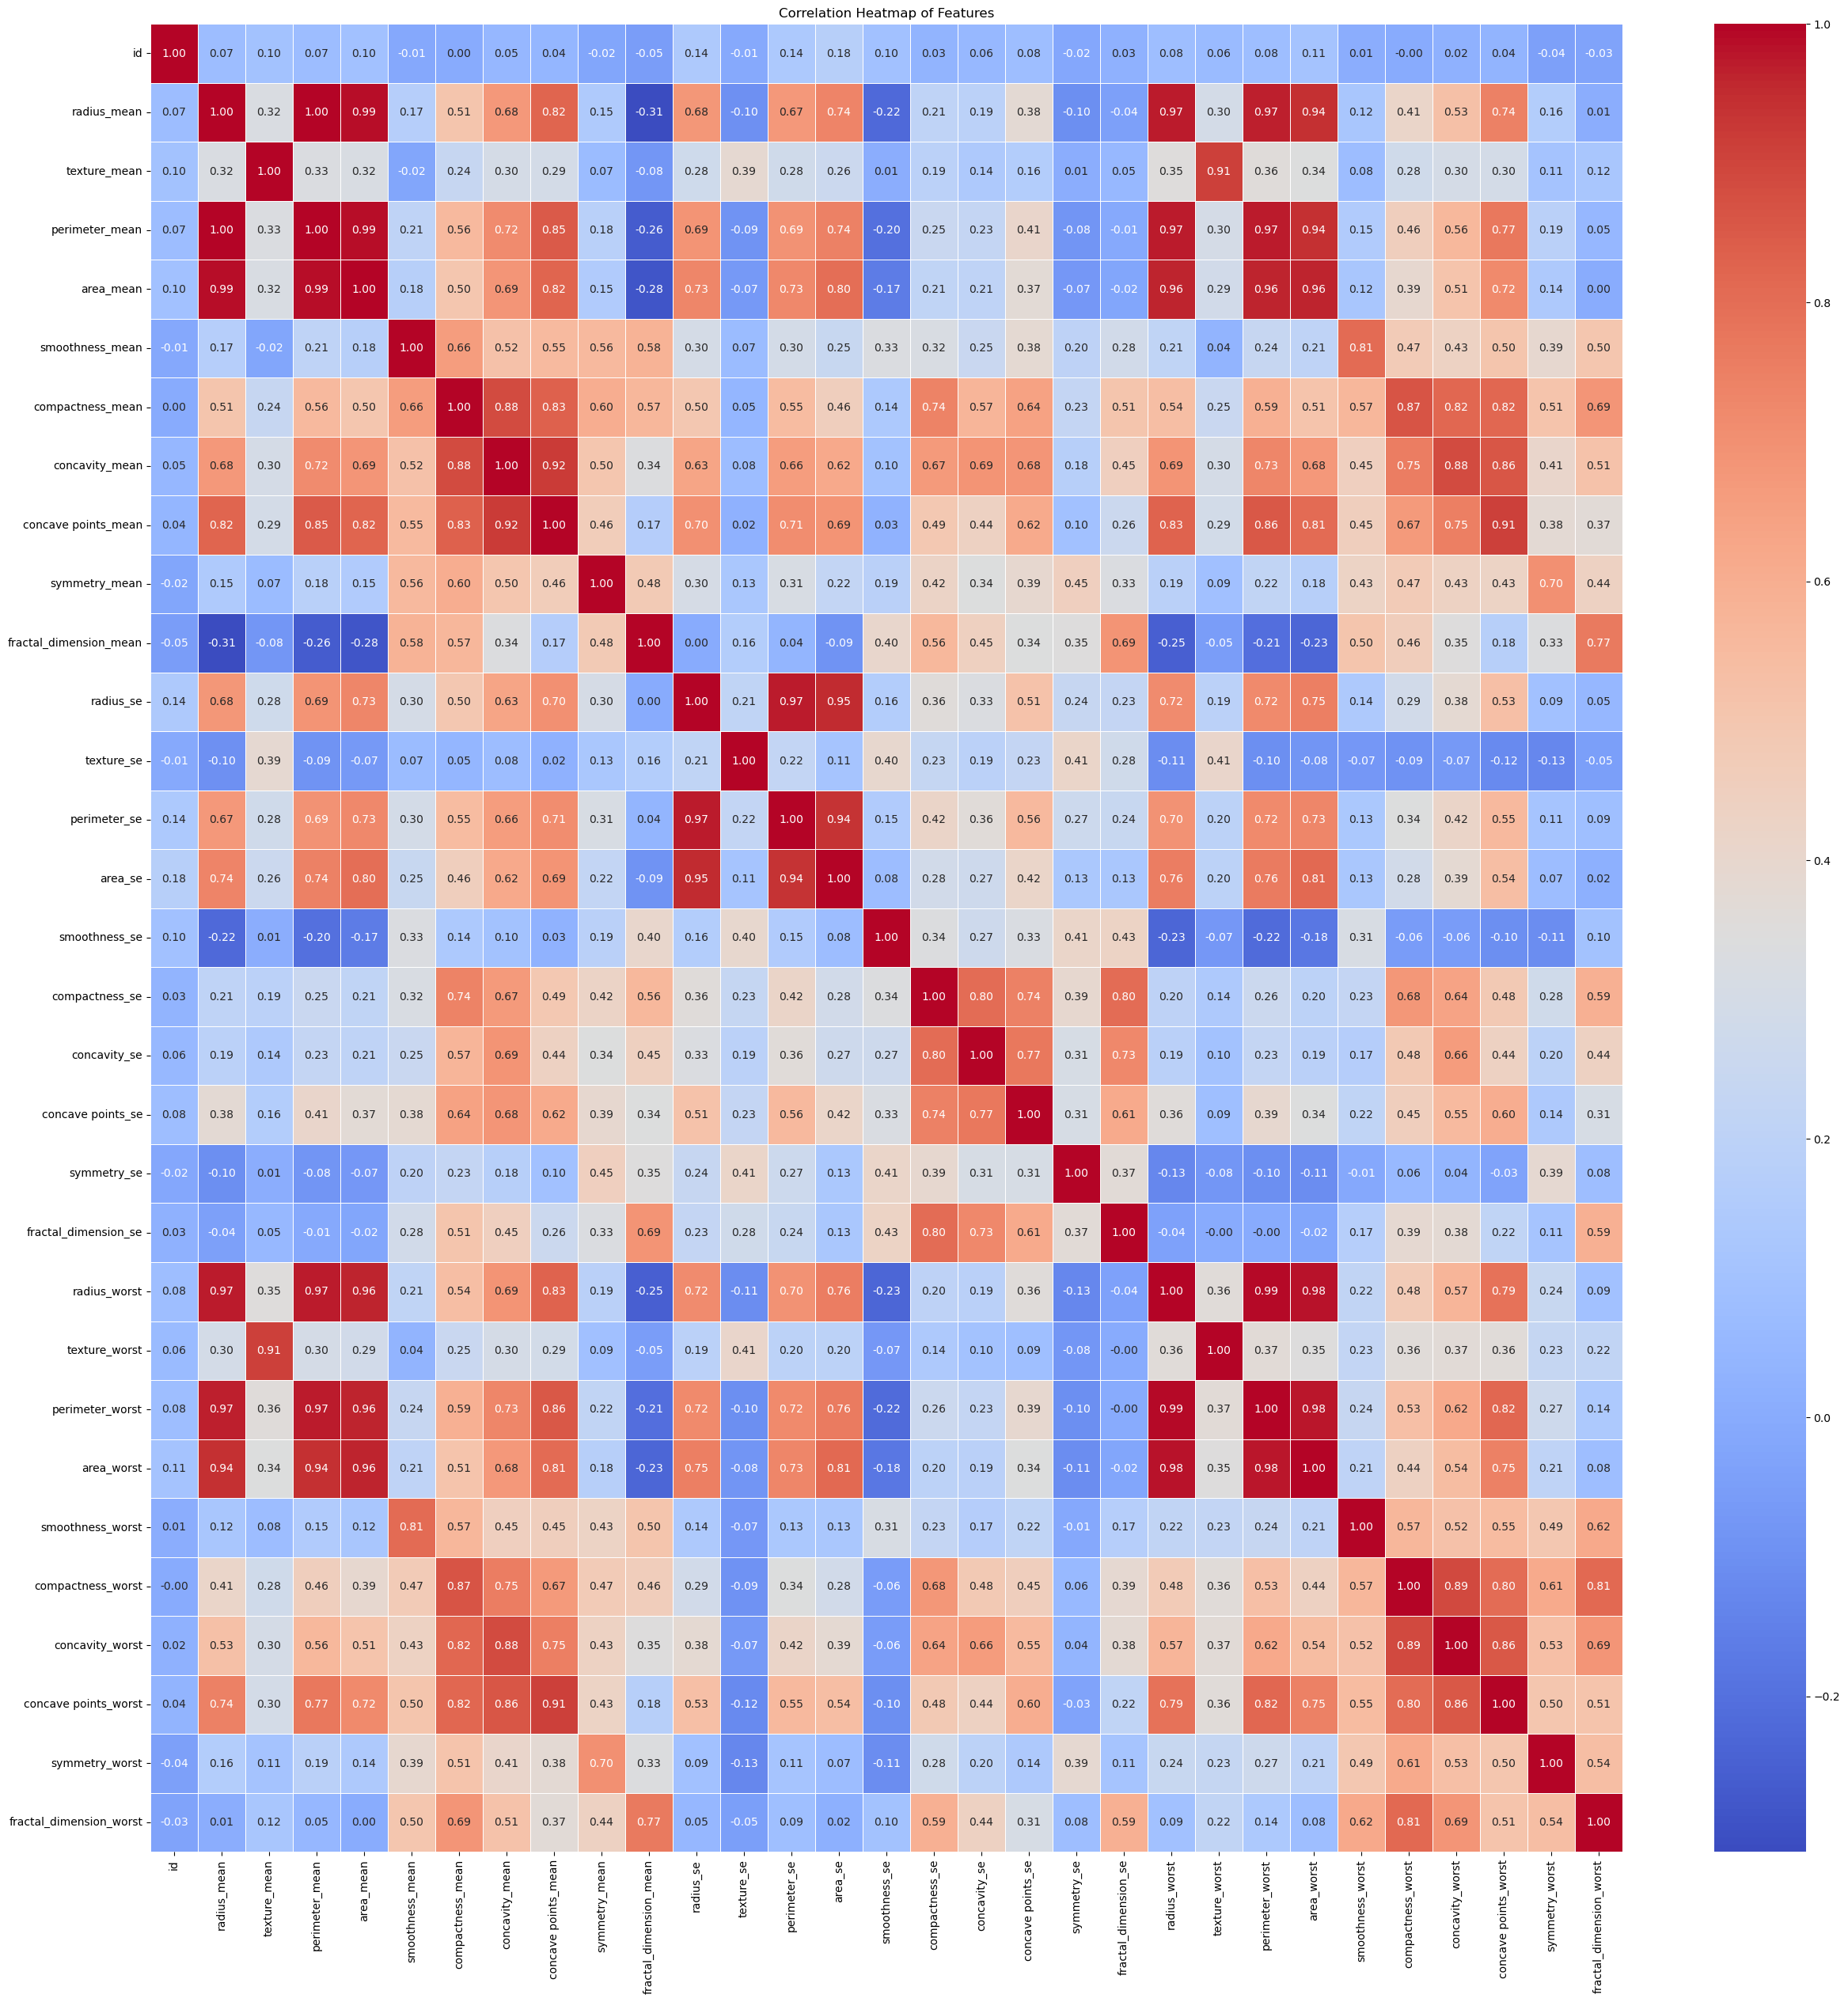

In [482]:
plt.figure(figsize=(30,30))
corr_matrix = Breast_Cancer_dataset_for_logstic_regression_model.drop('diagnosis', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

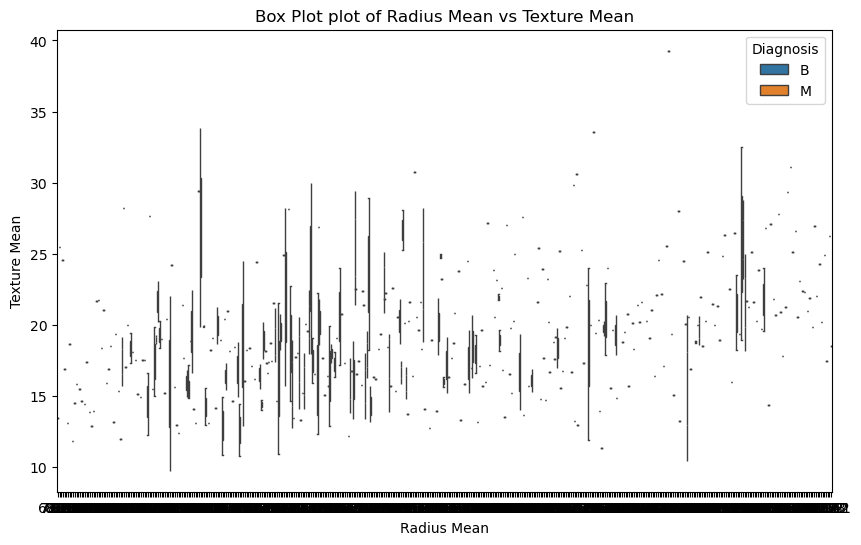

In [483]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Breast_Cancer_dataset_for_logstic_regression_model, x='radius_mean', y='texture_mean', hue='diagnosis')

plt.title('Box Plot plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()

In [484]:
Breast_Cancer_dataset_for_logstic_regression_model.drop(columns='id',inplace=True)

In [485]:
x_logistic = Breast_Cancer_dataset_for_logstic_regression_model.drop(columns='diagnosis')
y_logistic = Breast_Cancer_dataset_for_logstic_regression_model.diagnosis

In [486]:
# Using Label Encoder to encode target
encoder = LabelEncoder()
y_logistic_encoded = encoder.fit_transform(y_logistic)

In [487]:
ros = RandomOverSampler()
x_logistic, y_logistic_encoded = ros.fit_resample(x_logistic, y_logistic_encoded)

In [488]:
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x_logistic, y_logistic_encoded, test_size=0.2, random_state=20)

In [489]:
# Use Logistc Regression Model
log_model = LogisticRegression()
log_model.fit(x_log_train, y_log_train)

d:\System Program\Anaconda\anaconda\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [490]:
print(f'Score of Model = {log_model.score(x_log_train, y_log_train) * 100} %')

Score of Model = 94.57092819614711 %


In [491]:
y_log_predict = log_model.predict(x_log_test)

In [492]:
# Accurecy of the model
accuracy_log = accuracy_score(y_log_test, y_log_predict)
print(f'Accuercy of Logistic Regression : {accuracy_log * 100} %')

Accuercy of Logistic Regression : 94.4055944055944 %


In [493]:
# Recall of the model
recall_log = recall_score(y_log_test, y_log_predict)
print(f'Recall of Logistic Regression : {recall_log * 100} %')

Recall of Logistic Regression : 93.33333333333333 %


In [494]:
# Percision of Logistic Regression model
percision_score_log = precision_score(y_log_test, y_log_predict)
print(f'Percision Score of Logistic Regression : {percision_score_log * 100} %')

Percision Score of Logistic Regression : 95.8904109589041 %


In [495]:
# Confustion Matrix of Logsitic regression model
confustion_matrix_log = confusion_matrix(y_log_test, y_log_predict)
print(f'Confustion Matrix of Logistic Regeression Model : {confustion_matrix_log}')

Confustion Matrix of Logistic Regeression Model : [[65  3]
 [ 5 70]]


In [496]:
# Classification Report of Logistic Regression
class_report_log = classification_report(y_log_test, y_log_predict)
print(f'Classification Report of Logistic Regression Model : {class_report_log}')

Classification Report of Logistic Regression Model :               precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.96      0.93      0.95        75

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [497]:
# #Save Model
# with open(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\Logistic_Regression'), 'wb') as file:
#     pickle.dump(log_model, file)

In [498]:
# Load Model
# with open(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\Breast_cancer_classificatoin'), 'rb') as file:
#     new_model = pickle.load(file)

Decision Tree

In [499]:
# import necessery libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [500]:
Breast_Cancer_dataset_for_Decision_tree_model = pd.read_csv(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\breast-cancer.csv'))
Breast_Cancer_dataset_for_Decision_tree_model.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [501]:
Breast_Cancer_dataset_for_Decision_tree_model.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [502]:
Breast_Cancer_dataset_for_Decision_tree_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [503]:
Breast_Cancer_dataset_for_Decision_tree_model.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [504]:
Breast_Cancer_dataset_for_Decision_tree_model.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [505]:
Breast_Cancer_dataset_for_Decision_tree_model.drop(columns='id', inplace=True)

In [506]:
x_tree = Breast_Cancer_dataset_for_Decision_tree_model.drop(columns='diagnosis') 
y_tree = Breast_Cancer_dataset_for_Decision_tree_model['diagnosis']

In [507]:
# Use label encoder to encoder categorized data
tree_encoder = LabelEncoder()
y_tree_encoded = tree_encoder.fit_transform(y_tree)

In [508]:
ros = RandomOverSampler()
x_tree, y_tree_encoded = ros.fit_resample(x_tree, y_tree_encoded)

In [509]:
# split dataset into train and test
x_tree_train, x_tree_test, y_tree_train, y_tree_test = train_test_split(x_tree, y_tree_encoded, test_size=0.2, random_state=20)

In [510]:
# Use Decision tree model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_tree_train, y_tree_train)

DecisionTreeClassifier()

In [511]:
y_tree_pred = dtree_model.predict(x_tree_test)

In [512]:
# Score of Decsision tree model
print(f'Score of the Decision tree model = {dtree_model.score(x_tree_test, y_tree_test) * 100} %')

Score of the Decision tree model = 98.6013986013986 %


In [513]:
# Accurecy of the Decision tree mode
accuracy_dtree = accuracy_score(y_tree_test, y_tree_pred)
print(f'Accuercy of Decision tree model : {accuracy_dtree * 100} %')

Accuercy of Decision tree model : 98.6013986013986 %


In [514]:
# Recall of Decision tree model
recall_dtree = recall_score(y_tree_test, y_tree_pred)
print(f'Recall of Decision tree model : {recall_dtree * 100} %')

Recall of Decision tree model : 98.66666666666667 %


In [515]:
# Percision Score
percision_score_tree = precision_score(y_tree_test, y_tree_pred)
print(f'Percision Score of Decision Tree model : {percision_score_tree *100 } %')

Percision Score of Decision Tree model : 98.66666666666667 %


In [516]:
# Confustion Matrix of Decision Tree model
confusion_matrix_dtree = confusion_matrix(y_tree_test, y_tree_pred)
print(f'Confustion Matrix of Decision tree model : {confusion_matrix_dtree}')

Confustion Matrix of Decision tree model : [[67  1]
 [ 1 74]]


In [517]:
# Classification Reprot of Decision Tree model
class_report_dtree = classification_report(y_tree_test, y_tree_pred)
print(f'Classificatoin Matrix of Decision tree model : {class_report_dtree}')

Classificatoin Matrix of Decision tree model :               precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.99      0.99      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [518]:
# #Save Model
# with open(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\Decision_Tree'), 'wb') as file:
#     pickle.dump(dtree_model, file)

SVM

In [519]:
# import necessery libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [520]:
cancer_Breast_Cancer_dataset_for_SVM = pd.read_csv(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\breast-cancer.csv'))
cancer_Breast_Cancer_dataset_for_SVM.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [521]:
cancer_Breast_Cancer_dataset_for_SVM.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [522]:
cancer_Breast_Cancer_dataset_for_SVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [523]:
cancer_Breast_Cancer_dataset_for_SVM.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [524]:
cancer_Breast_Cancer_dataset_for_SVM.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [525]:
cancer_Breast_Cancer_dataset_for_SVM.drop(columns='id', inplace=True)

In [526]:
svm_x = cancer_Breast_Cancer_dataset_for_SVM.drop(columns='diagnosis')
svm_y = cancer_Breast_Cancer_dataset_for_SVM.diagnosis

In [527]:
# Use Label Encoder to encoder categroize data
svm_encoder = LabelEncoder()
svm_encoded_y = svm_encoder.fit_transform(svm_y)

In [528]:
ros = RandomOverSampler()
svm_x, svm_encoded_y = ros.fit_resample(svm_x, svm_encoded_y)

In [529]:
# split data into train and test
x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(svm_x, svm_encoded_y, test_size=0.2, random_state=20)

In [530]:
# Using SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(x_svm_train, y_svm_train)

SVC()

In [531]:
# Score of SVM model
print(f'Score of SVM model : {svm_model.score(x_svm_test, y_svm_test) * 100} %')

Score of SVM model : 90.20979020979021 %


In [532]:
# Prediction of SVM model
y_svm_pred = svm_model.predict(x_svm_test)

In [533]:
# Accurecy of SVM model
accuracy_svm = accuracy_score(y_svm_test, y_svm_pred)
print(f'Accurecy of SVM model : {accuracy_svm * 100} %')

Accurecy of SVM model : 90.20979020979021 %


In [534]:
# Recall of SVM model
recall_svm = recall_score(y_svm_test, y_svm_pred)
print(f'Recall of SVM model : {recall_svm * 100} %')

Recall of SVM model : 85.33333333333334 %


In [535]:
# Percision Score
percision_score_svm = precision_score(y_svm_test, y_svm_pred)
print(f'Percision Score of SVM : {percision_score_svm *100 } %')

Percision Score of SVM : 95.52238805970148 %


In [536]:
# Confusion Matrix of SVM model
confusion_matrix_svm = confusion_matrix(y_svm_test, y_svm_pred)
print(f'Confustion matrix of SVM model : {confusion_matrix_svm}')

Confustion matrix of SVM model : [[65  3]
 [11 64]]


### TP  FN
### FP  TN

In [537]:
# Classificatoin Report of SVM model
class_report_svm = classification_report(y_svm_test, y_svm_pred)
print(f'Classificatoin report of SVM model : {class_report_svm}')

Classificatoin report of SVM model :               precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.96      0.85      0.90        75

    accuracy                           0.90       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.90      0.90       143



In [538]:
# #Save Model
# with open(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\SVM'), 'wb') as file:
#     pickle.dump(svm_model, file)

In [539]:
# Linear Kernal for SVM model
svm_lin_model = SVC(kernel='linear')
svm_lin_model.fit(x_svm_train, y_svm_train)

SVC(kernel='linear')

In [540]:
# Score of SVM model
print(f'Score of SVM Linear model : {svm_lin_model.score(x_svm_test, y_svm_test) * 100} %')

Score of SVM Linear model : 96.5034965034965 %


In [541]:
# Prediction of SVM model
y_svm_lin_pred = svm_lin_model.predict(x_svm_test)

In [542]:
# Accurecy of SVM model
accuracy_svm_lin = accuracy_score(y_svm_test, y_svm_lin_pred)
print(f'Accurecy of SVM Linear model : {accuracy_svm_lin * 100} %')

Accurecy of SVM Linear model : 96.5034965034965 %


In [543]:
# Recall of SVM model
recall_lin_svm = recall_score(y_svm_test, y_svm_lin_pred)
print(f'Recall of SVM Linear model : {recall_lin_svm * 100} %')

Recall of SVM Linear model : 96.0 %


In [544]:
# Percision Score
percision_score_lin_svm = precision_score(y_svm_test, y_svm_lin_pred)
print(f'Percision Score of SVM Linear : {percision_score_lin_svm *100 } %')

Percision Score of SVM Linear : 97.2972972972973 %


In [545]:
# Confusion Matrix of SVM Linear model
confusion_matrix_Linear_svm = confusion_matrix(y_svm_test, y_svm_lin_pred)
print(f'Confustion matrix of SVM Linear model : {confusion_matrix_Linear_svm}')

Confustion matrix of SVM Linear model : [[66  2]
 [ 3 72]]


In [546]:
# Classificatoin Report of SVM Linear model
class_report_Linear_svm = classification_report(y_svm_test, y_svm_lin_pred)
print(f'Classificatoin report of SVM Linear model : {class_report_Linear_svm}')

Classificatoin report of SVM Linear model :               precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       0.97      0.96      0.97        75

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



KNN

In [547]:
# import necessery libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [548]:
cancer_Breast_Cancer_dataset_for_KNN = pd.read_csv(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\breast-cancer.csv'))
cancer_Breast_Cancer_dataset_for_KNN.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [549]:
cancer_Breast_Cancer_dataset_for_KNN.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [550]:
cancer_Breast_Cancer_dataset_for_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [551]:
cancer_Breast_Cancer_dataset_for_KNN.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [552]:
cancer_Breast_Cancer_dataset_for_KNN.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [553]:
cancer_Breast_Cancer_dataset_for_KNN.drop(columns='id', inplace=True)

In [554]:
KNN_x= cancer_Breast_Cancer_dataset_for_KNN.drop(columns='diagnosis')
KNN_y = cancer_Breast_Cancer_dataset_for_KNN.diagnosis

In [555]:
# Use Label Encoder to encode categroize data
KNN_encoder = LabelEncoder()
KNN_encoded_y = KNN_encoder.fit_transform(KNN_y)

In [556]:
ros = RandomOverSampler()
KNN_x, KNN_encoded_y = ros.fit_resample(KNN_x, KNN_encoded_y)

In [557]:
# split data into train and test
x_KNN_train, x_KNN_test, y_KNN_train, y_KNN_test = train_test_split(KNN_x, KNN_encoded_y, test_size=0.2, random_state=20)

In [558]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_KNN_train, y_KNN_train)

KNeighborsClassifier()

In [559]:
# Score of KNN model
print(f'Score of KNN model : {KNN_model.score(x_KNN_test, y_KNN_test) * 100} %')

Score of KNN model : 90.9090909090909 %


In [560]:
# Prediction of KNN model
y_KNN_pred = KNN_model.predict(x_KNN_test)

In [561]:
# Accurecy of SVM model
accuracy_KNN = accuracy_score(y_KNN_test, y_KNN_pred)
print(f'Accurecy of KNN model : {accuracy_KNN * 100} %')

Accurecy of KNN model : 90.9090909090909 %


In [562]:
# Recall of SVM model
recall_KNN = recall_score(y_KNN_test, y_KNN_pred)
print(f'Recall of KNN model : {recall_KNN * 100} %')

Recall of KNN model : 88.0 %


In [563]:
# Percision Score
percision_score_KNN = precision_score(y_KNN_test, y_KNN_pred)
print(f'Percision Score of KNN : {percision_score_KNN *100 } %')

Percision Score of KNN : 94.28571428571428 %


In [564]:
# Confusion Matrix of SVM model
confusion_matrix_KNN = confusion_matrix(y_KNN_test, y_KNN_pred)
print(f'Confustion matrix of KNN model : {confusion_matrix_KNN}')

Confustion matrix of KNN model : [[64  4]
 [ 9 66]]


In [565]:
# Classificatoin Report of SVM model
class_report_KNN = classification_report(y_KNN_test, y_KNN_pred)
print(f'Classificatoin report of KNN model : {class_report_KNN}')

Classificatoin report of KNN model :               precision    recall  f1-score   support

           0       0.88      0.94      0.91        68
           1       0.94      0.88      0.91        75

    accuracy                           0.91       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.91      0.91      0.91       143



In [566]:
# #Save Model
# with open(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\KNN'), 'wb') as file:
#     pickle.dump(KNN_model, file)

Naive Baye

In [567]:
# import necessery libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [568]:
cancer_Breast_Cancer_dataset_for_Naive_Bayes = pd.read_csv(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\breast-cancer.csv'))
cancer_Breast_Cancer_dataset_for_Naive_Bayes.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [569]:
cancer_Breast_Cancer_dataset_for_Naive_Bayes.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [570]:
cancer_Breast_Cancer_dataset_for_Naive_Bayes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [571]:
cancer_Breast_Cancer_dataset_for_Naive_Bayes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [572]:
cancer_Breast_Cancer_dataset_for_Naive_Bayes.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [573]:
cancer_Breast_Cancer_dataset_for_Naive_Bayes.drop(columns='id', inplace=True)

In [574]:
Naive_x = cancer_Breast_Cancer_dataset_for_Naive_Bayes.drop(columns='diagnosis')
Naive_y = cancer_Breast_Cancer_dataset_for_Naive_Bayes.diagnosis

In [575]:
Naive_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [576]:
# Use Lable Encoder to encode categorize data
Naive_encoder = LabelEncoder()
Naive_y_encoded = Naive_encoder.fit_transform(Naive_y)

In [577]:
ros = RandomOverSampler()
Naive__X, Naive_y_encoded = ros.fit_resample(Naive_x, Naive_y_encoded)

In [578]:
# split data into train and test
Naive_x_train, Naive_x_test, Naive_y_train, Naive_y_test = train_test_split(Naive__X, Naive_y_encoded, test_size=0.2, random_state=20)

In [579]:
Naive_bayes = GaussianNB()
Naive_bayes.fit(Naive_x_train, Naive_y_train)

GaussianNB()

In [580]:
# Score of Naive Bayes model
print(f'Score of Naive Bayes model : {Naive_bayes.score(Naive_x_test, Naive_y_test) * 100} %')

Score of Naive Bayes model : 96.5034965034965 %


In [581]:
# Prediction of Naive bayes model
Naive_bayes_Predict_y = Naive_bayes.predict(Naive_x_test)

In [582]:
# Accurecy of Naive Bayes model
Naive_bayes_accurecy = accuracy_score(Naive_y_test, Naive_bayes_Predict_y)
print(f'Accurecy of Naive Bayes model : {Naive_bayes_accurecy * 100} %')

Accurecy of Naive Bayes model : 96.5034965034965 %


In [583]:
# Recall of Niave Bayes model
Naive_bayes_recall = recall_score(Naive_y_test, Naive_bayes_Predict_y)
print(f'Recall of Naive Bayes model : {Naive_bayes_recall * 100} %')

Recall of Naive Bayes model : 94.66666666666667 %


In [584]:
# Percision Score
Naive_Bayes_percision = precision_score(Naive_y_test, Naive_bayes_Predict_y)
print(f'Percision Score of Niave Bayes model : {Naive_Bayes_percision *100 } %')

Percision Score of Niave Bayes model : 98.61111111111111 %


In [585]:
# Confusion Matrix of Naive Bayes model
Naive_bayes_confustion_matrix = confusion_matrix(Naive_y_test, Naive_bayes_Predict_y)
print(f'Confustion matrix of Naive Bayes model : {Naive_bayes_confustion_matrix}')

Confustion matrix of Naive Bayes model : [[67  1]
 [ 4 71]]


In [586]:
# Classificatoin Report of Naive Bayes model
Naive_bayes_class_report = classification_report(Naive_y_test, Naive_bayes_Predict_y)
print(f'Classificatoin report of Naive Bayes model : {Naive_bayes_class_report}')

Classificatoin report of Naive Bayes model :               precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       0.99      0.95      0.97        75

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [587]:
# #Save Model
# with open(replace_back_slash_with_slash(r'D:\University\Level - 3\Semester - 1\Machine Learning\Project\Naive_Bayes'), 'wb') as file:
#     pickle.dump(Naive_bayes, file)